# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

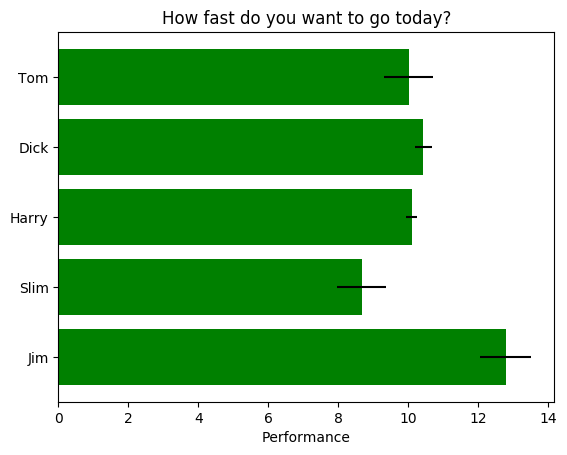

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

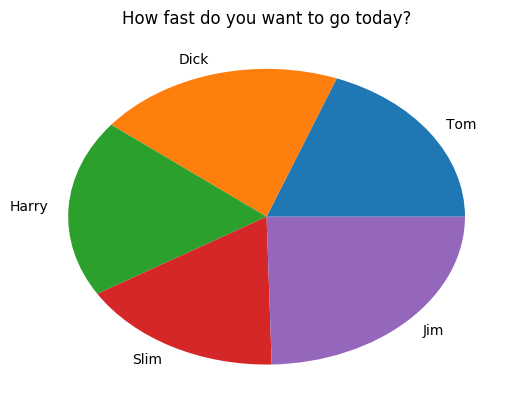

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

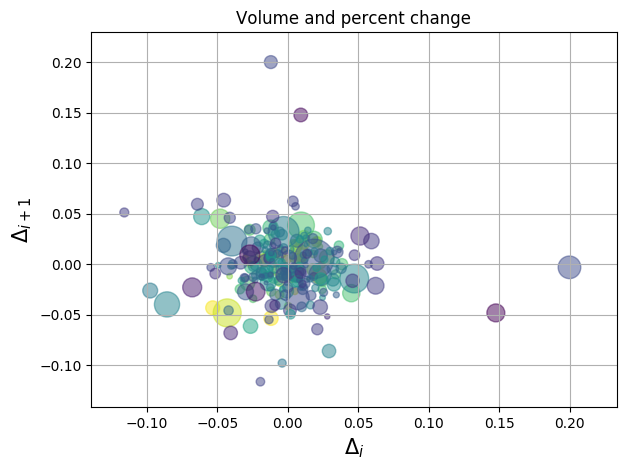

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

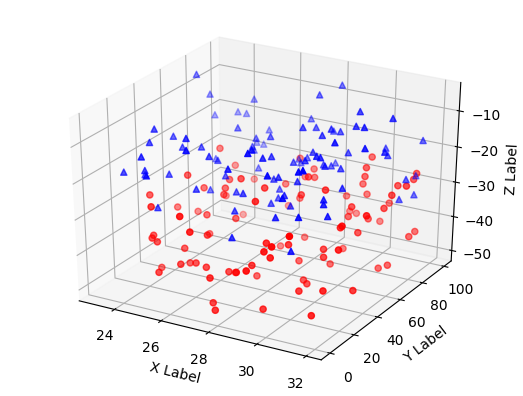

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



In [0]:
# TODO - fun, possibly interactive plots!

## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

url= "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
#Let's give a proper tags to the header based on additional database file information
#Let's give a proper tags to the header based on additional database file information
data2 = pd.read_csv(url, header=None, names=['Buying','Maintenance','Doors','Persons','Lug_Boot','Safety', "Class_Value"])
                             
data2.head()

#Let's code the text values in the columns into numerical values

data3 = data2.replace('?', np.NaN)
data3.head()
data3.isnull().sum()

#The data is pretty clean

#Now let's code the text values into numerical values

#class values: unacc:0, acc:1, good:2, vgood:3
#buying:   vhigh:3, high:2, med:1, low:0.
#maintenance:    vhigh:3, high:2, med:1, low:0.
#doors:    2, 3, 4, 5more:5.
#persons:  2, 4, more:5.
#lug_boot: small:0, med:1, big:2.
#safety:   low:0, med:1, high:2.

#Swap the string values with numerical values using the map function
newclass = {'unacc':0, 'acc':1, 'good':2, 'vgood':3};
newbuying= {'vhigh':3, 'high':2, 'med':1, 'low':0};
newmaintenance={'vhigh':3, 'high':2, 'med':1, 'low':0};
newdoors={'5more':5};
newpersons={2:2, 4:4,'more':5};
newlugboot={'small':0, "med":1, 'big':2};
newsafety={"low":0, "med":1, "high":2}

#Using the map function 
data3['Class_Value']= data3['Class_Value'].map(newclass);
data3['Buying']= data3['Buying'].map(newbuying);
data3['Maintenance']= data3['Maintenance'].map(newmaintenance);
#data3['Doors']= data2['Doors'].map(newdoors);
#data3['Persons']= data3['Persons'].map(newpersons);
data3['Safety']= data3['Safety'].map(newsafety);
data3['Lug_Boot']= data3['Lug_Boot'].map(newlugboot);


#Using an if condition for the DOORS and the Persons columns
for x in range (0, len(data2["Doors"])):
  if data2['Doors'][x]=='5more':
    data3['Doors'][x]=5
  if data2['Persons'][x]=='more':
    data3["Persons"][x]=5

#Print the data3 dataframe
print(data3.head(5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   Buying  Maintenance Doors Persons  Lug_Boot  Safety  Class_Value
0       3            3     2       2         0       0            0
1       3            3     2       2         0       1            0
2       3            3     2       2         0       2            0
3       3            3     2       2         1       0            0
4       3            3     2       2         1       1            0


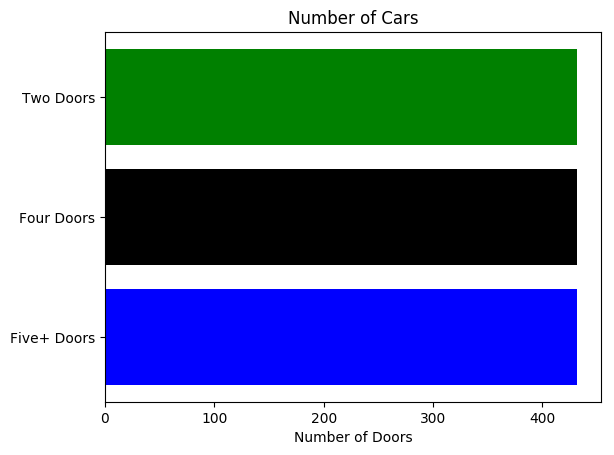

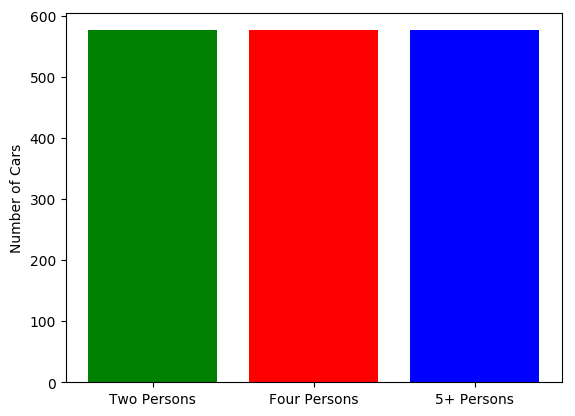

In [37]:
#Let's create two bar graphs, one for the number of cars with 2,4, 5+ doors, and the same graphs for persons

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data



Doors = ('Two Doors','Four Doors', 'Five+ Doors')
y_pos = np.arange(len(Doors))


#Let's count the number of cars with two, four or five plus doors respectively
twod=0
for x in range (0, len(data3['Doors'])):
  if int(data3["Doors"][x]) ==2:
    twod=twod+1
    
fourd=0
for x in range (0, len(data3['Doors'])):
  if int(data3["Doors"][x])==4:
    fourd=fourd+1

fived=0
for x in range (0, len(data3['Doors'])):
  if data3["Doors"][x]==5:
    fived=fived+1

Doornumber = [twod, fourd, fived]


#Let's do a bar graph
ax.barh(y_pos, Doornumber, align='center',
        color=["green", 'black', 'blue'])
ax.set_yticks(y_pos)
ax.set_yticklabels(Doors)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Doors')
ax.set_title('Number of Cars')

plt.show()


#Let's create the same plot for the number of persons

Persons = ('Two Persons','Four Persons', 'Five+ Persons')
y_pos = np.arange(len(Persons))


#Let's count the number of cars with two, four or five plus persons respectively
twod=0
for x in range (0, len(data3['Persons'])):
  if int(data3["Persons"][x]) ==2:
    twod=twod+1
    
fourd=0
for x in range (0, len(data3['Persons'])):
  if int(data3["Persons"][x])==4:
    fourd=fourd+1

fived=0
for x in range (0, len(data3['Persons'])):
  if data3["Persons"][x]==5:
    fived=fived+1
    
Personnumber= [twod, fourd, fived];
plt.bar(y_pos,Personnumber, color=["green", 'red', 'blue'])
plt.xticks(y_pos, ('Two Persons', 'Four Persons', '5+ Persons'))
plt.ylabel("Number of Cars")
plt.show()


#Bar graph 1

#What the bar graph shows us is that the cars are equally distributed in each category

#Bar graph 2

#The bar graph shows us that the number of cars are equally distributed for each number of cars 




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


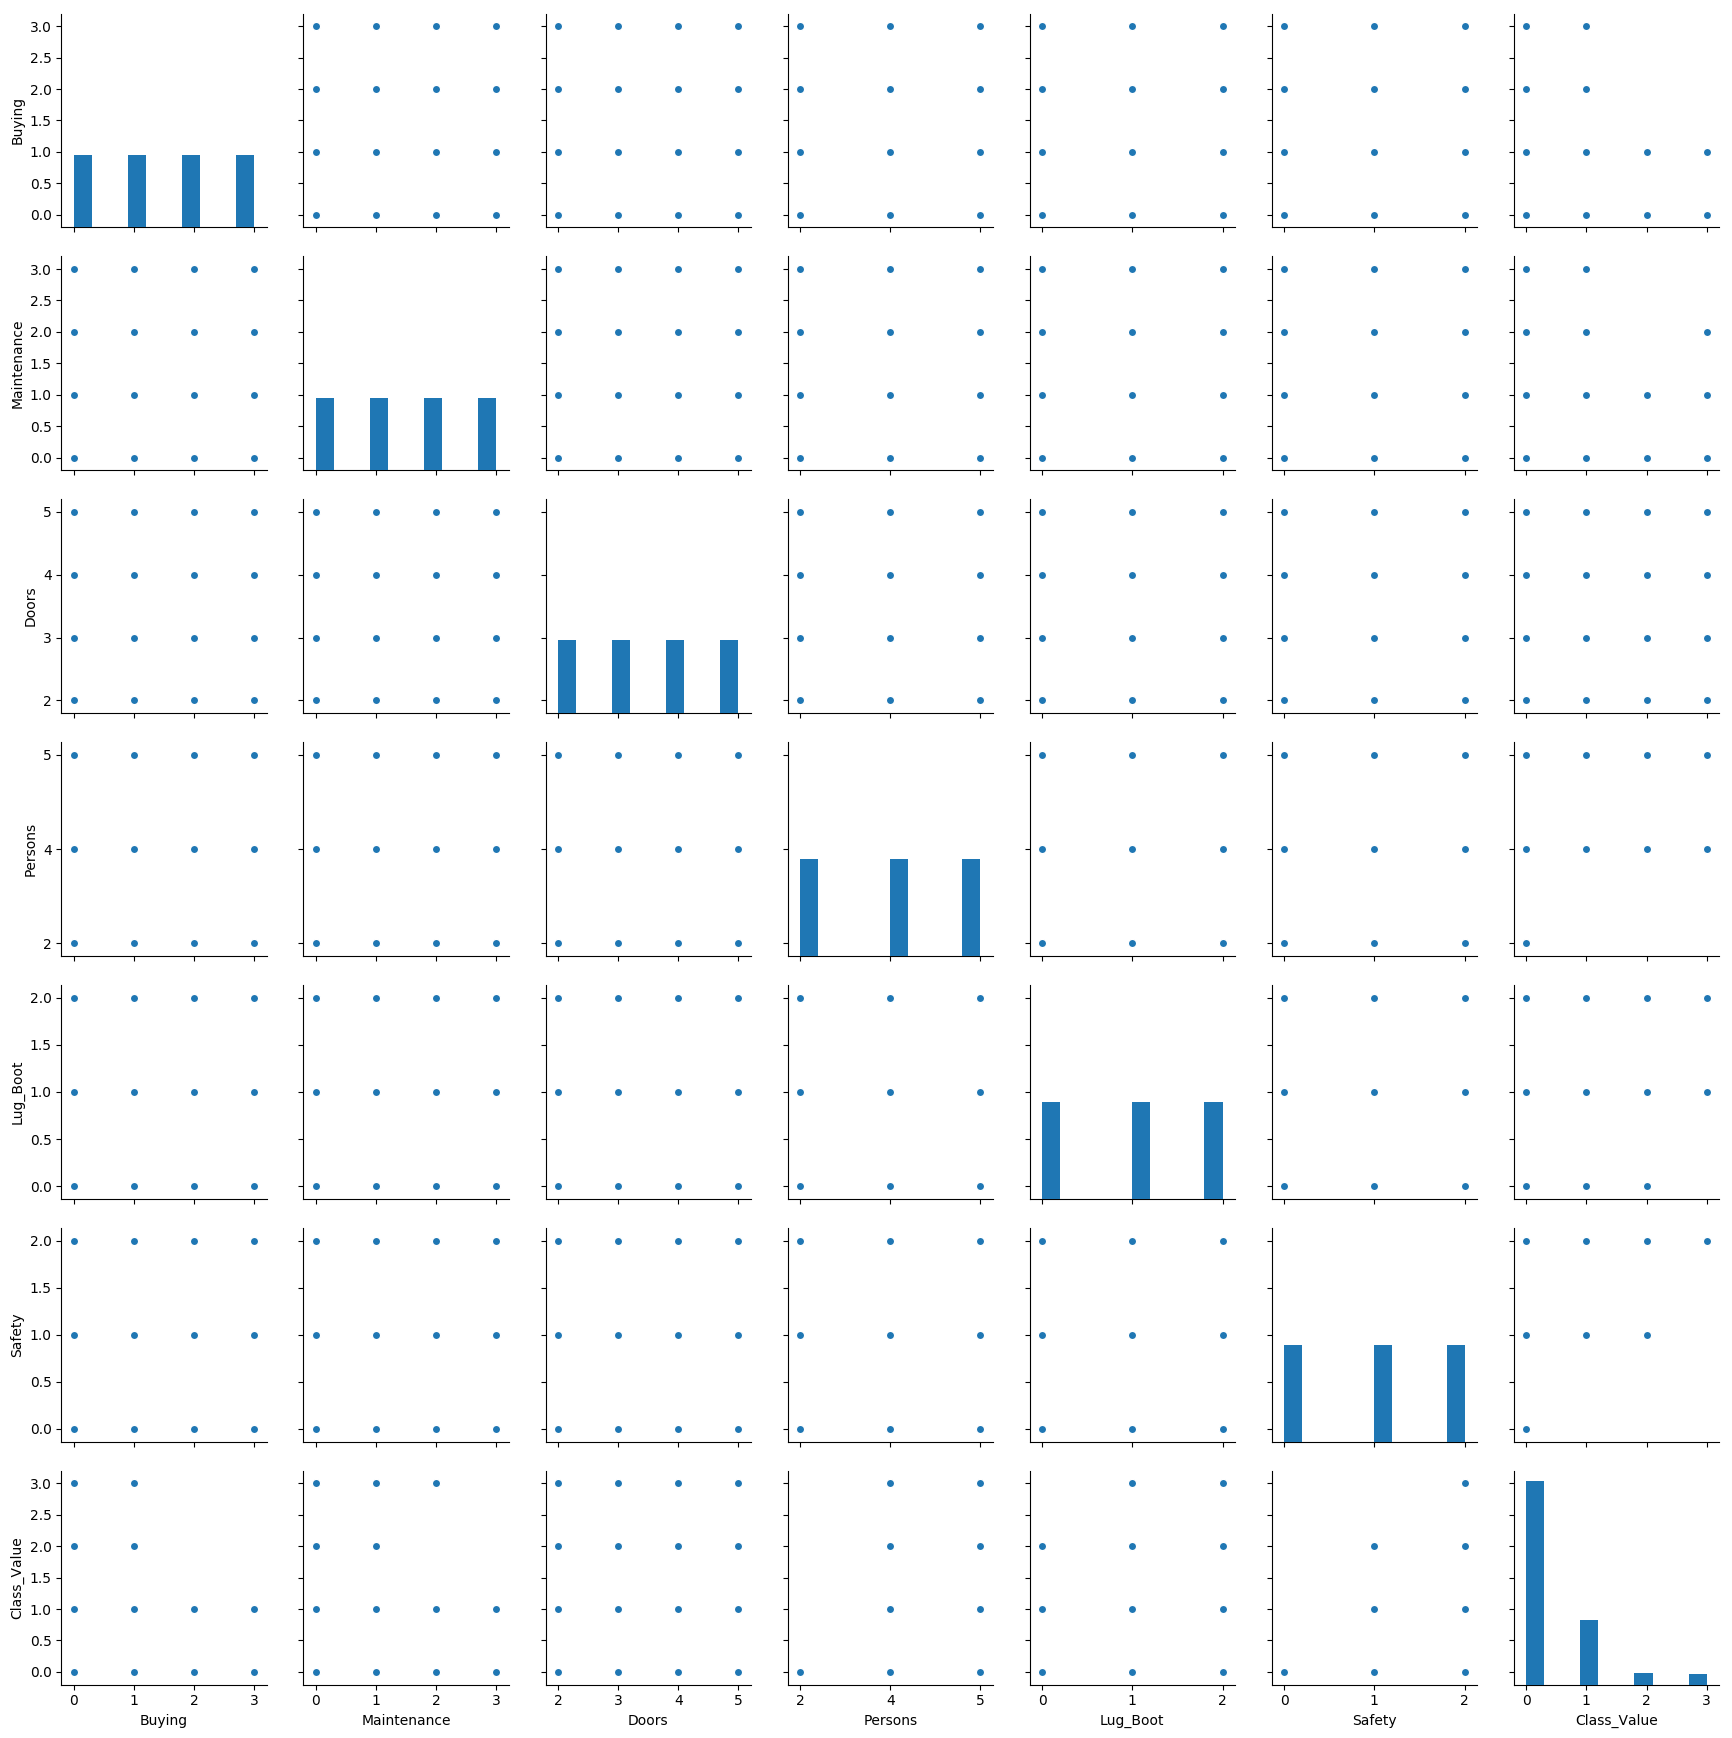

In [32]:
#Let's try some pairplot on seaborn
data4=data3

#I had a dtype issue so I made sure that all values in the dataframe were strings
for x in range (0, len(data2["Doors"])):
  if data3['Doors'][x]==5:
    data4['Doors'][x]='5'
  if data3['Persons'][x]==5:
    data4["Persons"][x]='5'
#Plot 
sns.pairplot(data4)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7d9a5eb00>,
      dtype=object)

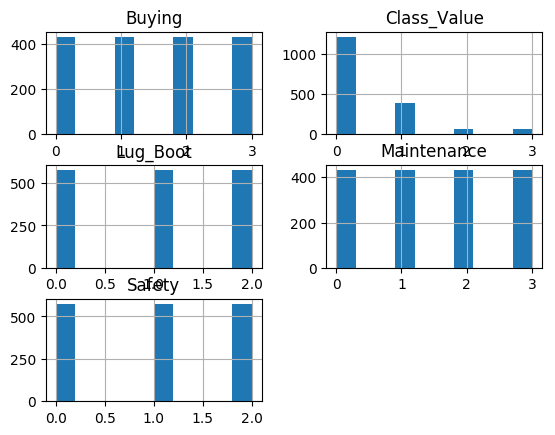

In [33]:
#Histogram just for fun
data3.hist()

